# Question 1

Question 1: Given some sample data, write a program to answer the following:

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

* a) Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 
* b) What metric would you report for this dataset?
* c) What is its value?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sneakers_df = pd.read_csv(r'C:\Users\taewoo\Desktop\coding challenge\2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')
sneakers_df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [3]:
print(sneakers_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB
None


## 1. a

In [4]:
sneakers_df['order_amount'].describe([0.5, 0.75, 0.90])

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
50%         284.000000
75%         390.000000
90%         531.000000
max      704000.000000
Name: order_amount, dtype: float64

mean is 3145.13 and standard deviation is 41282.54, but 90th percentile fall under 531.00.

Let's plot the data to see what's happening.

In [5]:
sneakers_df['created_at'] = pd.to_datetime(sneakers_df['created_at'])

print(sneakers_df['created_at'])

0      2017-03-13 12:36:56
1      2017-03-03 17:38:52
2      2017-03-14 04:23:56
3      2017-03-26 12:43:37
4      2017-03-01 04:35:11
               ...        
4995   2017-03-30 13:47:17
4996   2017-03-16 20:36:16
4997   2017-03-19 05:42:42
4998   2017-03-16 14:51:18
4999   2017-03-18 15:48:18
Name: created_at, Length: 5000, dtype: datetime64[ns]


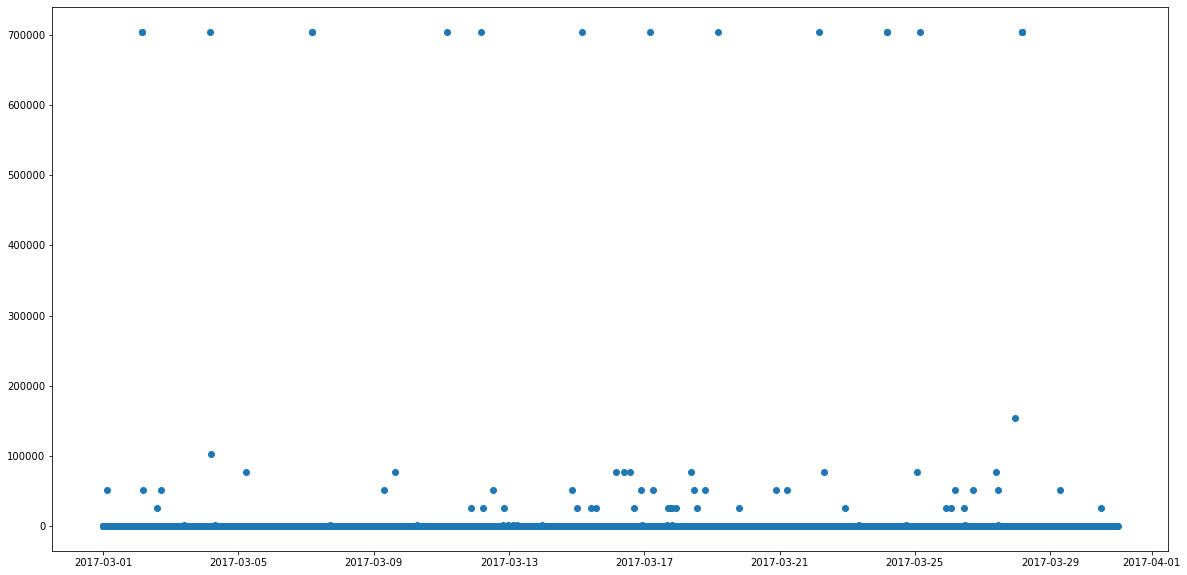

In [6]:
plt.figure(figsize=(20,10))
plt.scatter('created_at','order_amount', data=sneakers_df)
plt.show()

In [7]:
# roughly set the upper limit to 200000
outliers = sneakers_df.loc[sneakers_df['order_amount'] > 200000]
outliers.head(10)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 04:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 04:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 04:00:00
1104,1105,42,607,704000,2000,credit_card,2017-03-24 04:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 04:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 04:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 04:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 04:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 04:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 04:00:00


Clearly, average is hugely affected by the outliers.

Let's see what happens to the average after removing outliers.

In [8]:
no_outliers = sneakers_df.loc[sneakers_df['order_amount'] < 200000]
print('Means')
print('With outliers {}'.format(sneakers_df['order_amount'].mean()))
print('With no outliers {}'.format(no_outliers['order_amount'].mean()))

Means
With outliers 3145.128
With no outliers 754.0919125025085


## 1. b & c

I personally think $754.10 is still a bit expensive to be called **affordable**

So, to effectively minimize the noise created by outliers, **median** would be the better method of measuring

In [9]:
print('Medians')
print('With outliers {}'.format(sneakers_df['order_amount'].median()))
print('With no outliers {}'.format(no_outliers['order_amount'].median()))

Medians
With outliers 284.0
With no outliers 284.0


Median value of sneakers: $284.00

# Question 2

Question 2: For this question you’ll need to use SQL. Follow this link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

* a) How many orders were shipped by Speedy Express in total?
* b) What is the last name of the employee with the most orders?
* c) What product was ordered the most by customers in Germany?

## 2. a

In [ ]:
SELECT COUNT(OrderID) AS Speedy_Express_Total
FROM Orders
JOIN Shippers
ON (Orders.ShipperID = Shippers.ShipperID)
WHERE Shippers.ShipperID = 1;

**Result: 54**

## 2. b

In [ ]:
SELECT LastName, Count(Orders.OrderID) AS Total_Order
FROM Orders
JOIN Employees
ON Orders.EmployeeID = Employees.EmployeeID
GROUP BY Employees.LastName
ORDER BY Total_Order DESC
LIMIT 1;

**Result: Peacock**

## 2. c

In [ ]:
SELECT ProductName, Count(Orders.OrderID) as Total_Order
FROM Products
JOIN OrderDetails ON Products.ProductID = OrderDetails.ProductID
JOIN Orders ON Orders.OrderID = OrderDetails.OrderID
JOIN Customers on Customers.CustomerID = Orders.CustomerID
WHERE Customers.Country = 'Germany'
GROUP BY ProductName
ORDER BY Total_Order DESC;

Result: **Gorgonzola Telino - 5 times**